# Census Income Analysis

Import the necessasry libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from collections import Counter


Import warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

Load the Census dataset and change column names

In [3]:

dataframe = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary_detail'])

Display the dataset

In [4]:
dataframe.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_detail
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Create data dictionary giving description of columns in the dataset

Attribute Information: 


Details of attribues in data set are described below:
1. Age: Describes the age of individuals. Variable Type : Continuous
2. Workclass: Describes type of employment of individuals. Variable Type: Categorical
3. fnlwgt: Final weight on Current Population Survey. Variable Type :Continuous.
4. education: Describes type of education of individuals. Variable Type: Categorical
5. education-num: Number of years spent in education. Variable Type: Continuous.
6. marital-status: Describes marital status of individuals. Variable Type: Categorical
7. occupation: Describes occupation type of individuals. Variable Type: Categorical
8. relationship: Describes relationship of individuals to other members. Variable Type: Categorical
9. race: Race of the individual.  Variable Type: Categorical
10. sex: Gender of the individual. Variable Type: Categorical
11. capital-gain: Capital gain details of the individual. Variable Type: Continuous.
12. capital-loss: Capital loss details of the individual. Variable Type: Continuous.
13. hours-per-week: Hours worked per week. Variable Type: Continuous.
14. native-country: Native country of the individual. Variable Type: Categorical
15. salary_detail: Target class indicating salary >50K or  <=50K

# Fetch basic information about the dataset attributes

In [5]:
print('Shape of Entire Dataframe:',dataframe.shape)
dataframe.info()

Shape of Entire Dataframe: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary_detail   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:

The dataset contains no null values.

In [6]:
for i in range (0, dataframe.shape[1]):
    print("Data type of feature/column ", dataframe.columns[i]," is: ",type(dataframe.iloc[1,i]))

Data type of feature/column  age  is:  <class 'numpy.int64'>
Data type of feature/column  workclass  is:  <class 'str'>
Data type of feature/column  fnlwgt  is:  <class 'numpy.int64'>
Data type of feature/column  education  is:  <class 'str'>
Data type of feature/column  education-num  is:  <class 'numpy.int64'>
Data type of feature/column  marital-status  is:  <class 'str'>
Data type of feature/column  occupation  is:  <class 'str'>
Data type of feature/column  relationship  is:  <class 'str'>
Data type of feature/column  race  is:  <class 'str'>
Data type of feature/column  sex  is:  <class 'str'>
Data type of feature/column  capital-gain  is:  <class 'numpy.int64'>
Data type of feature/column  capital-loss  is:  <class 'numpy.int64'>
Data type of feature/column  hours-per-week  is:  <class 'numpy.int64'>
Data type of feature/column  native-country  is:  <class 'str'>
Data type of feature/column  salary_detail  is:  <class 'str'>


Observations:

1. Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
2.  Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.

In [7]:
dataframe.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations:

1. Minimum and maximum age of people in the dataset: 19 and 90 years respectively. Average age: 37.
2. The minimum and maximum years spent on education: 1 and 16 respectively. The mean education level: 10 years.
3. The minimum and average capital gain in the dataset: 0 maximum: 99999. This appears to indicate an error in the data collection.
4. The number of hours spent per week lies between 1 to 99 and the average is 40 hours.

# Exploratory Data Analysis

Removing target variable from dataset duplicate.

In [8]:
df = dataframe.copy()

Data Cleanup - Check for duplicate values

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
target_feature=df['salary_detail'].to_numpy()
del df['salary_detail']
target_feature

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [11]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
print(categorical_features)
numerical_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(numerical_features)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Check missing values in dataset

In [12]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


### Univariate Analysis for different categorical and continuous columns

In [13]:
# df[categorical_features[0]].value_counts().plot.bar()
for i in range(len(categorical_features)):
    print("Feature Name:",categorical_features[i])
    print("Attribute Details:",end='')
    print(df[categorical_features[i]].value_counts())
    print()

Feature Name: workclass
Attribute Details: Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Feature Name: education
Attribute Details: HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

Feature Name: marital-status
Attribute Details: Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Mar

There are many '?' values in the dataset for the features: occupation, workclass, native country. Replacing the values.

In [14]:
df['occupation'] = df['occupation'].replace([' ?'],'Unavailable')
df['workclass'] = df['workclass'].replace([' ?'],'Unavailable')
df['native-country'] = df['native-country'].replace([' ?'],'Unavailable')
df.loc[(df['native-country'] == 'Unavailable') & (df['occupation'] == 'Unavailable')]
df.shape

dataframe['occupation'] = dataframe['occupation'].replace([' ?'],'Unavailable')
dataframe['workclass'] = dataframe['workclass'].replace([' ?'],'Unavailable')
dataframe['native-country'] = dataframe['native-country'].replace([' ?'],'Unavailable')
dataframe.loc[(dataframe['native-country'] == 'Unavailable') & (dataframe['occupation'] == 'Unavailable')]
dataframe.shape

(32561, 15)

In [15]:
univariate_analysis_columns=list(df.columns)
len(univariate_analysis_columns)

14

Plotting features for conducting univariate analysis 

Column Name: age 0 0
Column Name: workclass 0 1
Column Name: fnlwgt 1 1
Column Name: education 1 0
Column Name: education-num 2 0
Column Name: marital-status 2 1
Column Name: occupation 3 1
Column Name: relationship 3 0
Column Name: race 4 0
Column Name: sex 4 1
Column Name: capital-gain 5 1
Column Name: capital-loss 5 0
Column Name: hours-per-week 6 0
Column Name: native-country 6 1


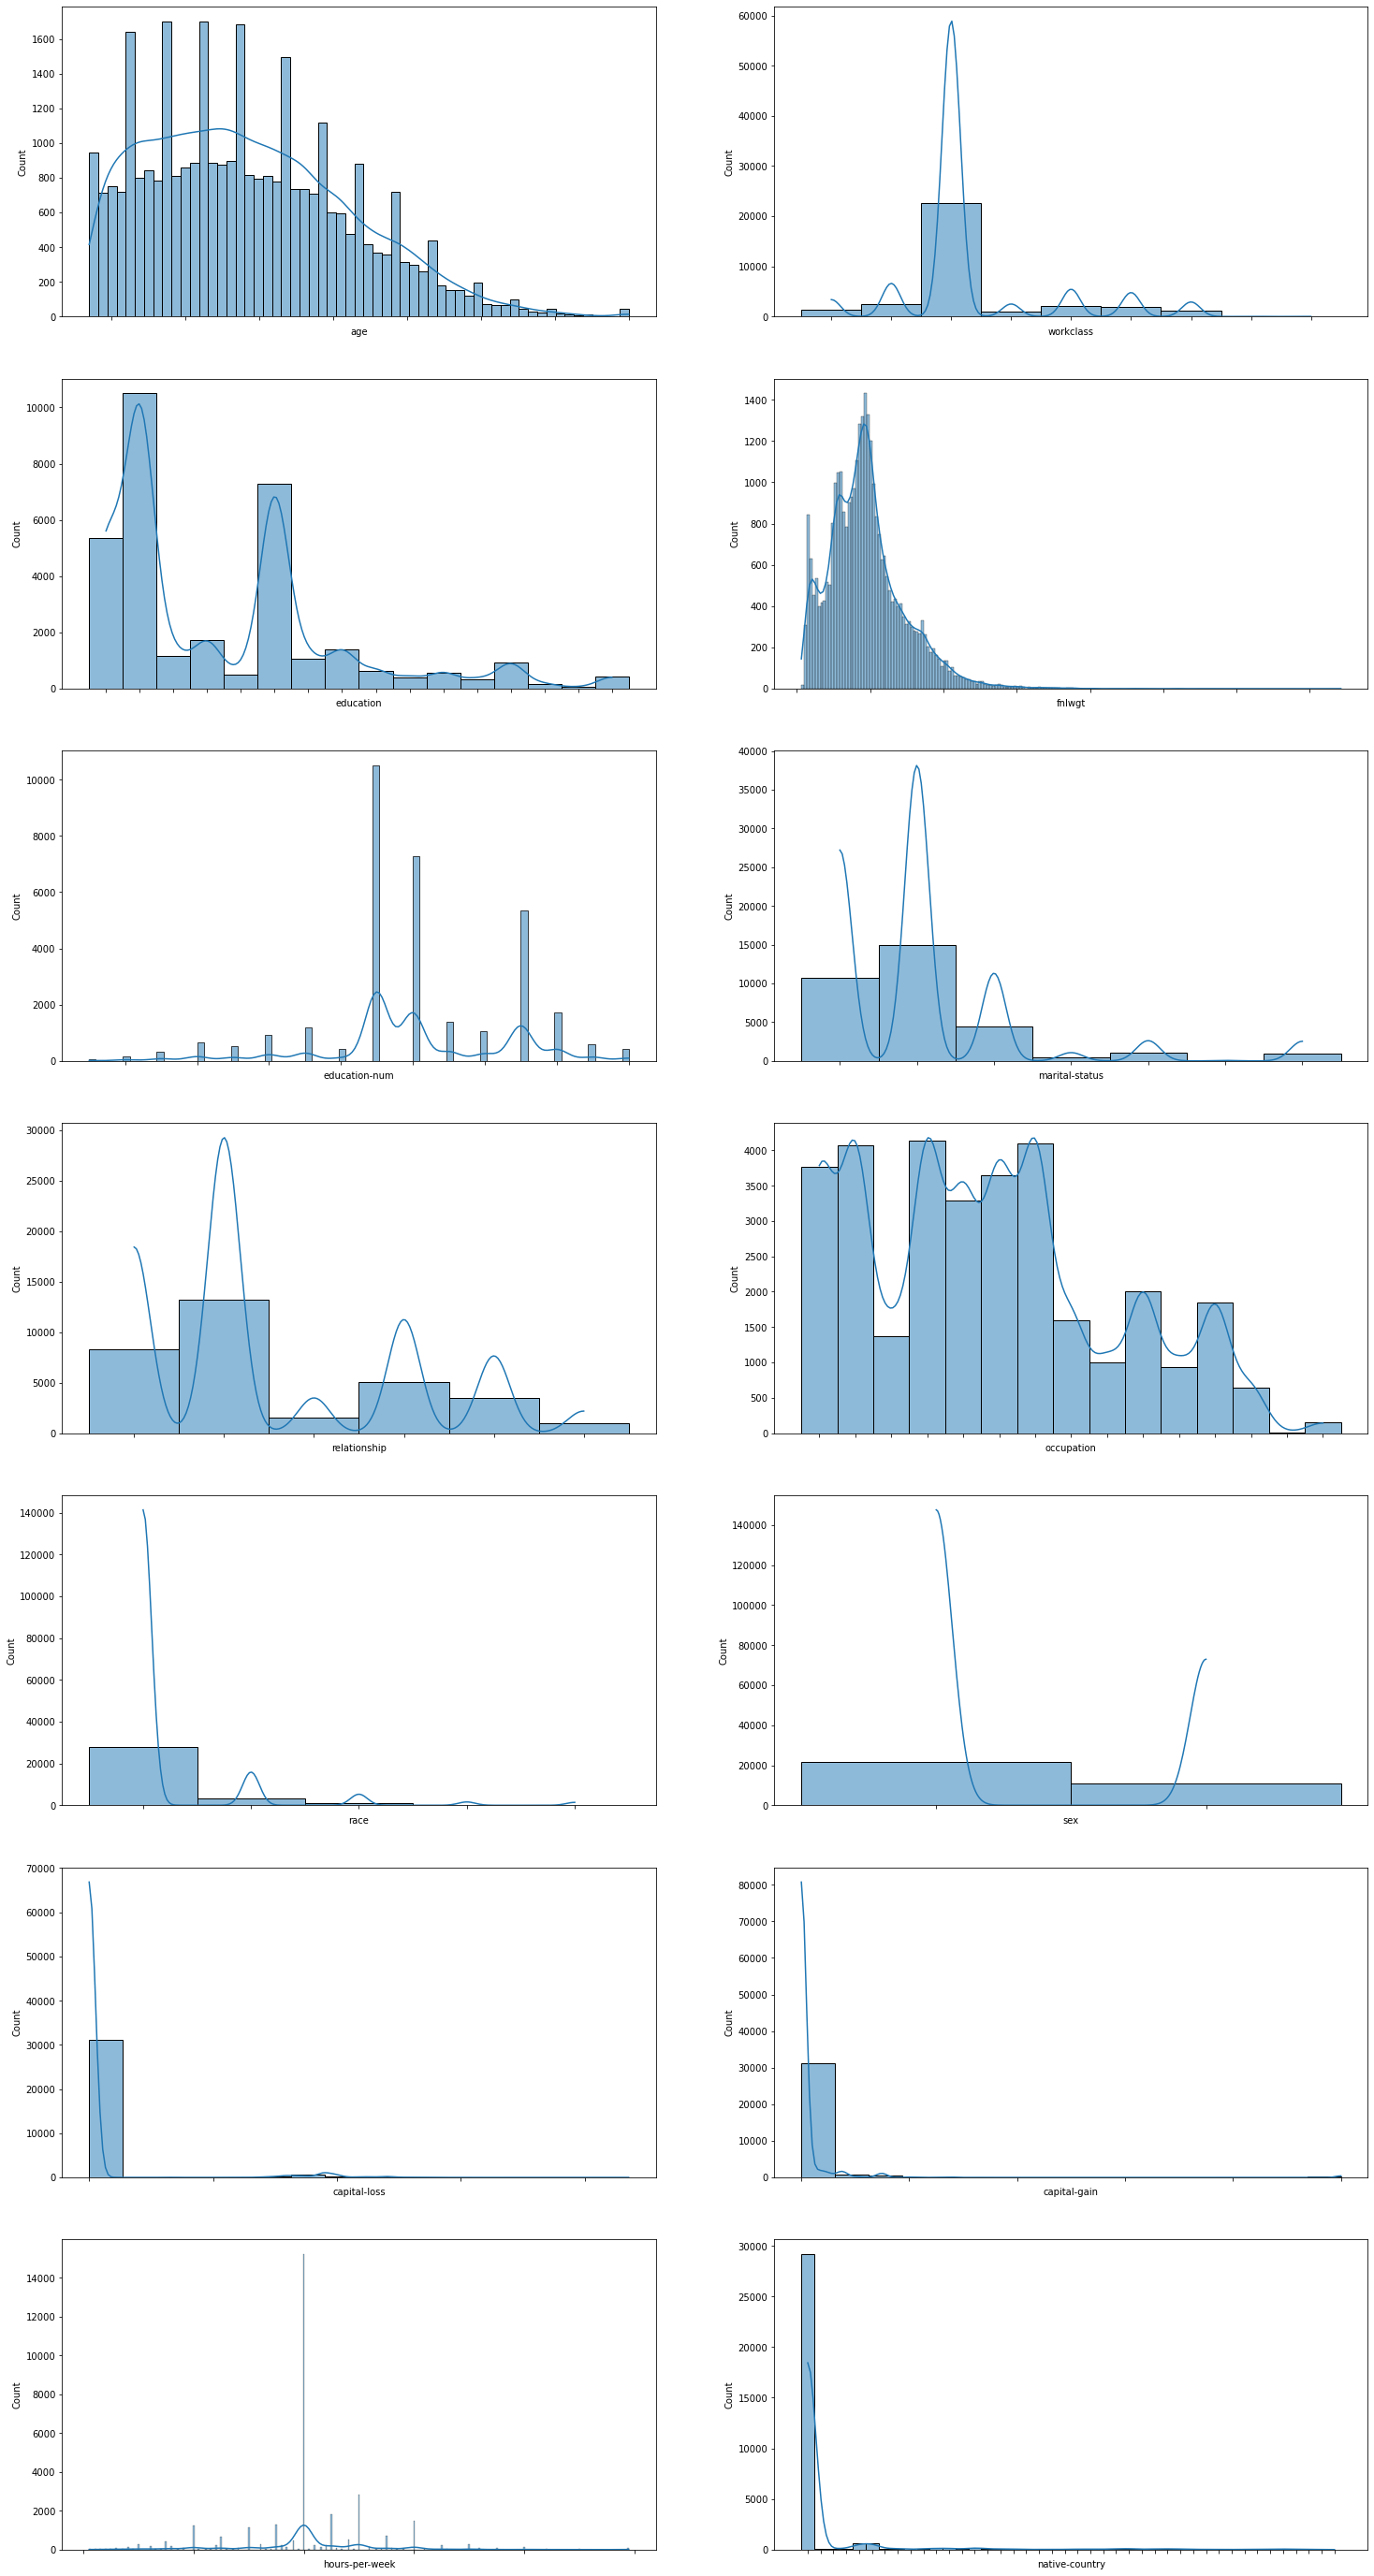

In [16]:
fig,ax = plt.subplots(int(len(univariate_analysis_columns)/2),int(len(univariate_analysis_columns)/7),figsize=(25,50))
c1=0
c2=0
flag=0
for i in range(0,len(univariate_analysis_columns)): 
    print('Column Name:', univariate_analysis_columns[i], c1,c2)
    g=sns.histplot(dataframe[univariate_analysis_columns[i]],ax=ax[c1,c2],kde=True)
    ax[c1,c2].set_xlabel(univariate_analysis_columns[i])
#   if univariate_analysis_columns[i]== 'Local' or univariate_analysis_columns[i]== 'Critical Risk':
    g.set_xticklabels(ax[c1,c2].get_xticklabels(),rotation=90)
    if flag==0:
        c2=c2+1
        flag=1
        if c2==2:
            c2=c2%2
    else:
        c1=c1+1
        flag=0
        if c1==7:
            c1=c1%7    

### Bivariate Analysis for different categorical and continuous columns

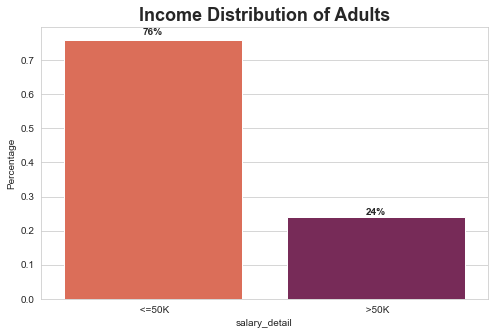

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = dataframe['salary_detail'].value_counts(normalize = True).rename_axis('salary_detail').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'salary_detail', y = 'Percentage', data = eda_percentage.head(10), palette='rocket_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Observation:

The number of people earning more than 50K dollars an year is roughly around one third of the people earning less than it. This leads to an imbalanced target class(handled later)

In [18]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

dataframe['age_group'] = dataframe['age'].apply(age_group)

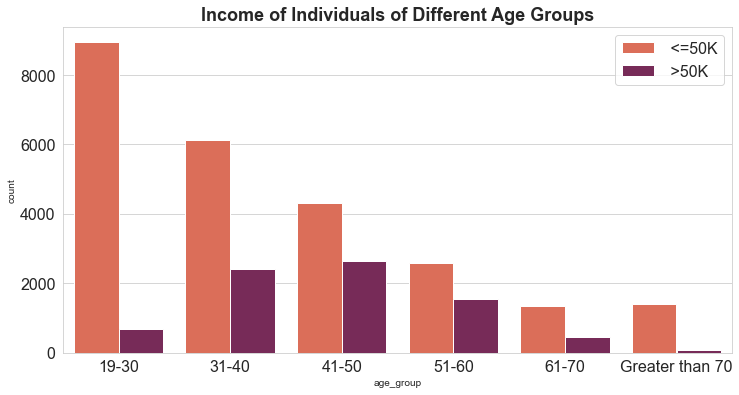

In [19]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(dataframe['age_group'], hue = dataframe['salary_detail'], palette='rocket_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Observations:

1. The number of people earning more than 50K is quite less compared to those earning more than 50K in the age group: 19-30.
2. For the people of age group 41-50 and 51-60, the number of people earning more than 50K is comparable to those earning less than 50K.

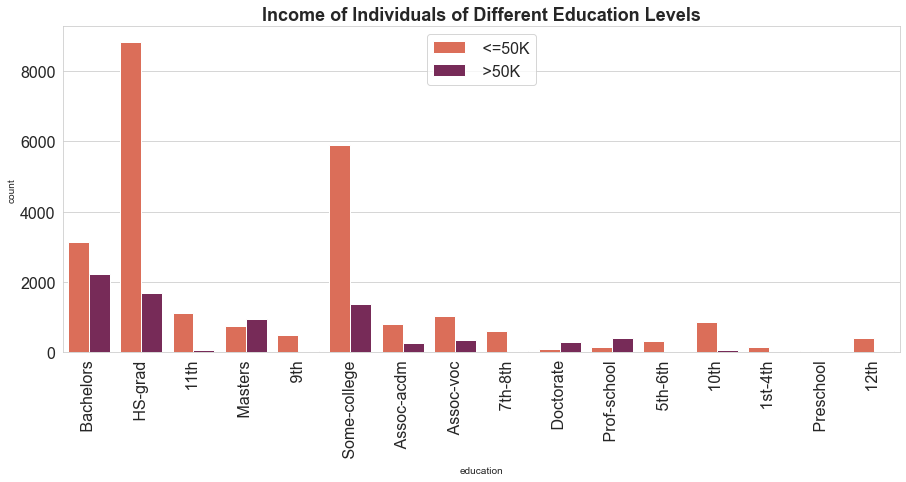

In [20]:
plt.figure(figsize=(15,6))
# #order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
#                 'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
#               'Assoc-acdm', 'Assoc-voc']
sns.countplot(dataframe['education'], hue = dataframe['salary_detail'], palette='rocket_r')
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Observations:

1. For the people who have completed their education up till 12th Standard, there are only a few who earn more than 50K dollars. Most of the people end up earning below 50K
2. For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars than the number of people earning less than 50K dollars.

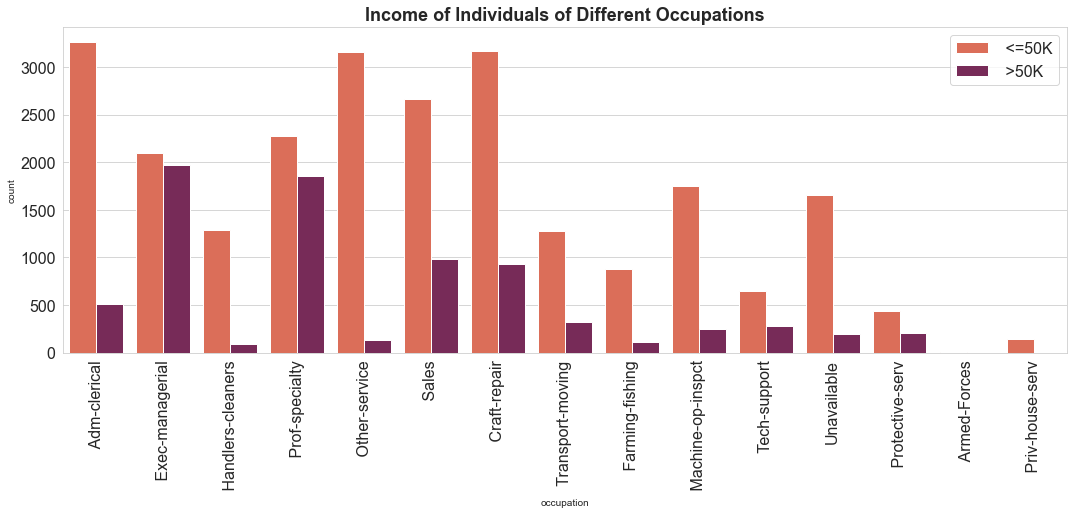

In [21]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(dataframe['occupation'], hue = dataframe['salary_detail'], palette='rocket_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Observations:

1. Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
2. Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.

# Multivariate Analysis

In [22]:
multivariate_analysis_columns=[]
multivariate_analysis_columns.append('education')
multivariate_analysis_columns.append('occupation')
multivariate_analysis_columns.append('hours-per-week')
multivariate_analysis_columns.append('salary_detail')
dataframe[multivariate_analysis_columns]

,education,occupation,hours-per-week,salary_detail
0,Bachelors,Adm-clerical,40,<=50K
1,Bachelors,Exec-managerial,13,<=50K
2,HS-grad,Handlers-cleaners,40,<=50K
3,11th,Handlers-cleaners,40,<=50K
4,Bachelors,Prof-specialty,40,<=50K
...,...,...,...,...
32556,Assoc-acdm,Tech-support,38,<=50K
32557,HS-grad,Machine-op-inspct,40,>50K
32558,HS-grad,Adm-clerical,40,<=50K
32559,HS-grad,Adm-clerical,20,<=50K


<Figure size 1440x1440 with 0 Axes>

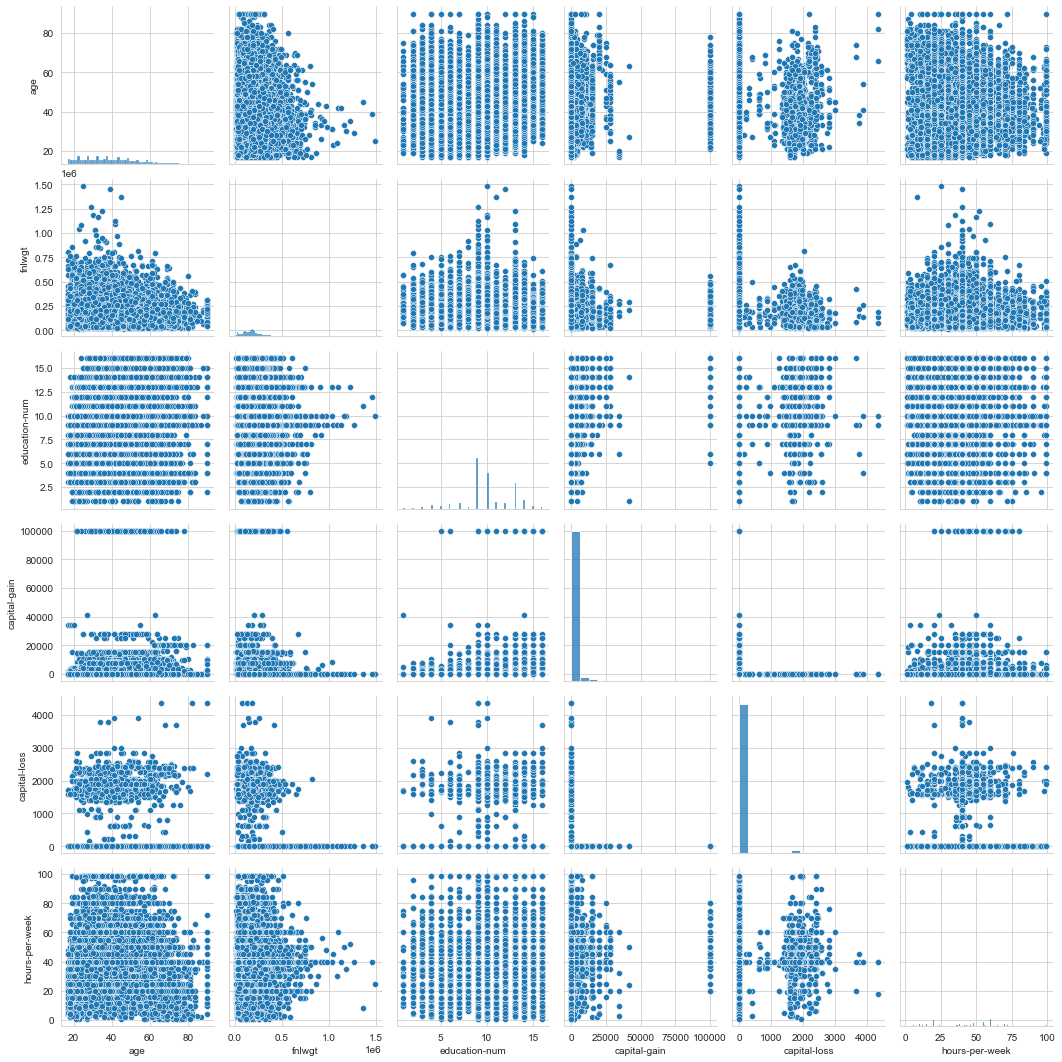

In [23]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

In [24]:
dataframe['salary_detail']=dataframe['salary_detail'].map({'<=50K': 0, '>50K': 1})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


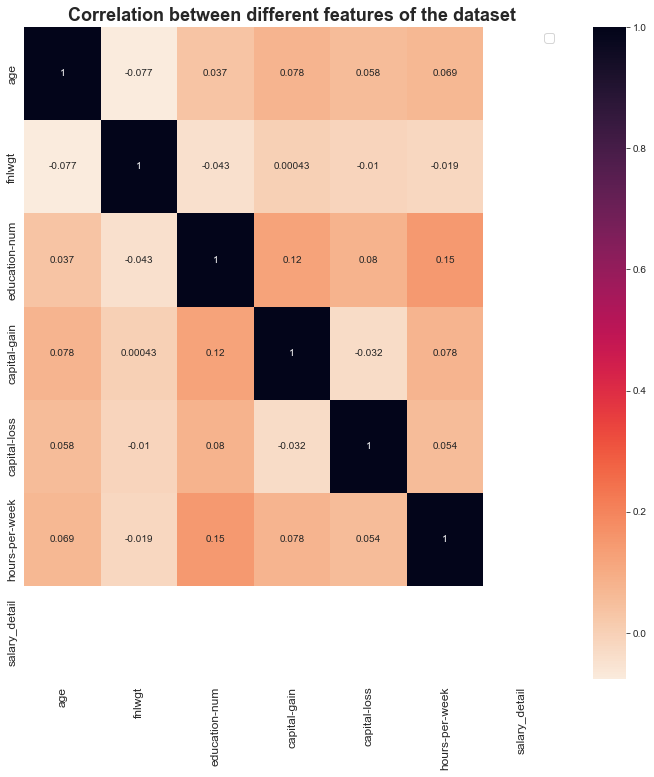

In [25]:
plt.figure(figsize = (12,12))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(dataframe.corr(), cmap = 'rocket_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

Observations:

Most of the features are positively correlated with the Income Variable.


Handling imbalance in the target class

In [26]:
# ! pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks

In [27]:
class Sampling_Techniques():
  def __init__(self,encoded_dataframe,y):
    self.encoded_dataframe=encoded_dataframe
    self.y=y
    # self.encoded_dataframe['Accident Level']=self.y
    # self.count=np.array(list(self.encoded_dataframe['Accident Level'].value_counts()))
    self.unique, self.count = np.unique(self.y, return_counts=True)
    # del self.encoded_dataframe['Accident Level']
   
  def CNN_undersampling(self):
    sampler= CondensedNearestNeighbour(n_neighbors=1)
    X_under, y_under = sampler.fit_resample(self.encoded_dataframe, self.y)
    print(X_under.shape,y_under.shape)
    print(pd.DataFrame(y_under).value_counts())

  def TomekLinks_undersampling(self):
    sampler= TomekLinks()
    X_under, y_under = sampler.fit_resample(self.encoded_dataframe, self.y)
    print(X_under.shape,y_under.shape)
    print(pd.DataFrame(y_under).value_counts())
    
  def SMOTE_oversampling(self,X_under,y_under,count_oversample):
    # print(count)
    temp=int((self.count.sum()-self.count[0])/(len(self.count)-1))
    strategy_oversample = {0:count_undersample[0], 1:count_undersample[1], 2:count_undersample[2], 3:count_undersample[3], 4:temp}
    sampler=SMOTE()
    X_over, y_over = sampler.fit_resample(X_under,y_under)
    # print(X_over.shape,y_over.shape)
    count_under_unique, count_undersample = np.unique(y_over, return_counts=True)
    print(count_undersample)
    return X_over,y_over,count_oversample,count_under_unique
  
  def Random_undersampling(self):
    # print(self.count)
    # print(pd.DataFrame(self.y).value_counts())
    # temp=int((self.count.sum()-self.count[0])/(len(self.count)-1))
    # print(temp)
    strategy_undersample = {self.unique[0]:7000, self.unique[1]:self.count[1]}
    # print(strategy_undersample)
    sampler=RandomUnderSampler(sampling_strategy=strategy_undersample,replacement=True)
    X_under, y_under = sampler.fit_resample(self.encoded_dataframe, self.y)
    # print(X_under.shape,y_under.shape)
    count_under_unique, count_undersample = np.unique(y_under, return_counts=True)
    # print(count_undersample)
    return X_under,y_under,count_undersample,count_under_unique

  def Random_upsampling(self,X_under,y_under,count_undersample,count_under_unique):
    # print(count_undersample)
    # temp=int((self.count.sum()-self.count[0])/(len(self.count)-3))
    strategy_oversample = {count_under_unique[0]:10000, count_under_unique[1]:10000}
    sampler=RandomOverSampler(sampling_strategy=strategy_oversample)
    X_over, y_over = sampler.fit_resample(X_under,y_under)
    # print(X_over.shape,y_over.shape)
    count_oversample=np.array(list(pd.DataFrame(y_over).value_counts()))
    # print(count_oversample)
    return X_over,y_over,count_oversample

  def calling_function(self):
    X_under,y_under,count_undersample,count_under_unique=self.Random_undersampling()
    X_over,y_over,count_oversample=self.Random_upsampling(X_under,y_under,count_undersample,count_under_unique)
    return X_over,y_over


In [28]:
target_feature.shape

(32537,)

In [29]:
sampler_main=[Sampling_Techniques(df,target_feature) for i in range(0,9)]
X,Y=[],[]
for i in sampler_main:
  X_temp,Y_temp=i.calling_function()
  X.append(X_temp)
  Y.append(Y_temp)

## Data Preparation for Modelling................. 

In [30]:
CURRENT_X=X[0]
CURRENT_Y=Y[0]

In [31]:
# Train and Test Split for First Model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(CURRENT_X,CURRENT_Y,random_state=0)  
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15000, 14), (5000, 14), (15000,), (5000,))

<h7> Encoders and Scaling </h7>

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
def encoding_scaler(x_train,x_test,columns_to_encode,encoder):
  for i in columns_to_encode:
    print(i)
    x_train[i]=encoder.fit_transform(x_train[i].values.reshape(-1,1))
    x_test[i]=encoder.transform(x_test[i].values.reshape(-1,1))
    # path='/content/drive/MyDrive/NLP_Chatbot_Capstone_Project/Cleaning Encoders/'
    # with open(path+str(name)+'_'+str(i),'wb') as f:
    #   pickle.dump(encoder,f)
  return x_train,x_test

In [33]:
# df.columns
# df['fnlwgt'].value_counts()

In [34]:
columns_to_label_encode=['workclass', 'marital-status','occupation','relationship','race','sex','native-country']
columns_to_ordinal_encode=['education']
columns_to_scale=['fnlwgt','age','education-num','capital-gain','capital-loss','hours-per-week']

In [35]:
x_train_cleaned,x_test_cleaned=encoding_scaler(x_train,x_test,columns_to_label_encode,LabelEncoder())
x_train_cleaned,x_test_cleaned=encoding_scaler(x_train_cleaned,x_test_cleaned,columns_to_ordinal_encode,OrdinalEncoder())
x_train_cleaned,x_test_cleaned=encoding_scaler(x_train_cleaned,x_test_cleaned,columns_to_scale,StandardScaler())

workclass
marital-status
occupation
relationship
race
sex
native-country
education
fnlwgt
age
education-num
capital-gain
capital-loss
hours-per-week


In [36]:
y_cleaner=LabelEncoder()
y_train_cleaned=y_cleaner.fit_transform(y_train)
y_test_cleaned=y_cleaner.transform(y_test)

# Modelling..................

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold 
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score

In [39]:
test_score_classifiers_default=[]
test_score_classifiers_grid_search_cv=[]
test_score_classifiers_random_search_cv=[]
test_score_classifiers_bayesian_optimization=[]

In [40]:

from sklearn.model_selection import cross_validate
def ML_classifier(x_train,x_test,y_train,y_test,name,classifier):
  model= classifier  
  optimum_param=cross_validate(estimator=model,X=pd.concat([x_train,x_test]),y=np.hstack((y_train,y_test)),\
    cv=10,scoring=['balanced_accuracy','precision_weighted','recall_weighted','f1_weighted'])  
  print('***************VALIDATION DATA METRICS(CROSS VALIDATION SCORES) ************************************************')
  # print(optimum_param)
  print("Balanced Accuracy Score is: %.3f%% (%.3f%%)" % (optimum_param['test_balanced_accuracy'].mean()*100, optimum_param['test_balanced_accuracy'].std()*100))
  print("Weighted Precison Score  is: %.3f%% (%.3f%%)" % (optimum_param['test_precision_weighted'].mean()*100, optimum_param['test_precision_weighted'].std()*100))
  print("Weighted Recall Score is: %.3f%% (%.3f%%)" % (optimum_param['test_recall_weighted'].mean()*100, optimum_param['test_recall_weighted'].std()*100))
  print("Weighted F-1 Score is: %.3f%% (%.3f%%)" % (optimum_param['test_f1_weighted'].mean()*100, optimum_param['test_f1_weighted'].std()*100))
  
  accuracy_score_mean_value,accuracy_score_std_value=optimum_param['test_balanced_accuracy'].mean()*100,optimum_param['test_balanced_accuracy'].std()*100
  precision_score_mean_value,precision_score_std_value=optimum_param['test_precision_weighted'].mean()*100,optimum_param['test_precision_weighted'].std()*100
  recall_score_mean_value,recall_score_std_value=optimum_param['test_recall_weighted'].mean()*100,optimum_param['test_recall_weighted'].std()*100
  f1_score_mean_value,f1_score_std_value=optimum_param['test_f1_weighted'].mean()*100,optimum_param['test_f1_weighted'].std()*100
  
  print()
  print('***************TESTING DATA METRICS(CURRENT SAMPLE SCORE) ************************************************')

  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  
  
  ll,ul=y_pred.mean()-1.96*(y_pred.std()/len(y_pred)),y_pred.mean()+1.96*(y_pred.std()/len(y_pred))
  print('Lower Limit of Confidence Interval:',ll)
  print('Upper Limit of Confidence Interval:',ul)
  print('Standard Mean:',y_test.mean())
  if y_test.mean() >=ll and y_test.mean()<=ul :
    print('95% confidence level')
  else:
    print('confidence level not achieved')
  
  # name=name+' Default'
  # path='/content/drive/MyDrive/NLP_Chatbot_Capstone_Project/Trained Default Machine Learning Classifiers/'
  # with open(path+'Model_'+str(name),'wb') as f:
  #   pickle.dump(model,f)

  train_f1_score=f1_score(y_train, model.predict(x_train), average='weighted')
  
  final_metrics=[train_f1_score,accuracy_score_mean_value,precision_score_mean_value,recall_score_mean_value,f1_score_mean_value,
  accuracy_score(y_test, y_pred),precision_score(y_test, y_pred, average='weighted'),
  recall_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred, average='weighted')]
  return final_metrics


In [41]:
x_train_cleaned.shape,x_test_cleaned.shape,y_train_cleaned.shape,y_test_cleaned.shape

((15000, 14), (5000, 14), (15000,), (5000,))

**Logistic Regression**

In [42]:
name='Logistic Regression'
classifier=LogisticRegression()
print('Name of Algorithm/Classifier Used:',name)
print()

final_metrics=ML_classifier(x_train_cleaned,x_test_cleaned,y_train_cleaned,y_test_cleaned,name,classifier)
f1_score_train_score_sample,accuracy,precision,recall,f1_score_test=final_metrics[0],final_metrics[1],final_metrics[2],final_metrics[3],final_metrics[4]
accuracy_score_sample,precision_score_sample,recall_score_sample,f1_score_sample=final_metrics[5],final_metrics[6],final_metrics[7],final_metrics[8]
test_score_classifiers_default.append([f1_score_train_score_sample,accuracy,precision,recall,f1_score_test,name])
print()
print('Weighted F-1 Score for the Current Sample of Training Data:',f1_score_train_score_sample)
print()
print('Accuracy Score for the Current Sample of Testing Data:',accuracy_score_sample)
print('Weighted Precision Score for the Current Sample of Testing Data:',precision_score_sample)
print('Weighted Recall Score for the Current Sample of Testing Data:',recall_score_sample)
print('Weighted F-1 Score for the Current Sample of Testing Data:',f1_score_sample)

Name of Algorithm/Classifier Used: Logistic Regression

***************VALIDATION DATA METRICS(CROSS VALIDATION SCORES) ************************************************
Balanced Accuracy Score is: 76.485% (0.346%)
Weighted Precison Score  is: 76.501% (0.341%)
Weighted Recall Score is: 76.485% (0.346%)
Weighted F-1 Score is: 76.481% (0.348%)

***************TESTING DATA METRICS(CURRENT SAMPLE SCORE) ************************************************
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2520
           1       0.76      0.78      0.77      2480

    accuracy                           0.77      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.77      0.77      0.77      5000

[[1903  617]
 [ 554 1926]]
Lower Limit of Confidence Interval: 0.5084040289944647
Upper Limit of Confidence Interval: 0.5087959710055354
Standard Mean: 0.496
confidence level not achieved

Weighted F-1 Score for the Curren

**Support Vector Machine**

In [43]:
name='Support Vector Machine'
classifier=SVC()
print('Name of Algorithm/Classifier Used:',name)
print()

final_metrics=ML_classifier(x_train_cleaned,x_test_cleaned,y_train_cleaned,y_test_cleaned,name,classifier)
f1_score_train_score_sample,accuracy,precision,recall,f1_score_test=final_metrics[0],final_metrics[1],final_metrics[2],final_metrics[3],final_metrics[4]
accuracy_score_sample,precision_score_sample,recall_score_sample,f1_score_sample=final_metrics[5],final_metrics[6],final_metrics[7],final_metrics[8]
test_score_classifiers_default.append([f1_score_train_score_sample,accuracy,precision,recall,f1_score_test,name])
print()
print('Weighted F-1 Score for the Current Sample of Training Data:',f1_score_train_score_sample)
print()
print('Accuracy Score for the Current Sample of Testing Data:',accuracy_score_sample)
print('Weighted Precision Score for the Current Sample of Testing Data:',precision_score_sample)
print('Weighted Recall Score for the Current Sample of Testing Data:',recall_score_sample)
print('Weighted F-1 Score for the Current Sample of Testing Data:',f1_score_sample)

Name of Algorithm/Classifier Used: Support Vector Machine

***************VALIDATION DATA METRICS(CROSS VALIDATION SCORES) ************************************************
Balanced Accuracy Score is: 76.665% (0.725%)
Weighted Precison Score  is: 76.999% (0.718%)
Weighted Recall Score is: 76.665% (0.725%)
Weighted F-1 Score is: 76.592% (0.736%)

***************TESTING DATA METRICS(CURRENT SAMPLE SCORE) ************************************************
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      2520
           1       0.73      0.83      0.77      2480

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000

[[1744  776]
 [ 431 2049]]
Lower Limit of Confidence Interval: 0.5648056632572054
Upper Limit of Confidence Interval: 0.5651943367427945
Standard Mean: 0.496
confidence level not achieved

Weighted F-1 Score for the Cur

### **Ensemble Techniques**

**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier
name='Random Forest'
classifier = RandomForestClassifier()
print('Name of Algorithm/Classifier Used:',name)
print()

final_metrics=ML_classifier(x_train_cleaned,x_test_cleaned,y_train_cleaned,y_test_cleaned,name,classifier)
f1_score_train_score_sample,accuracy,precision,recall,f1_score_test=final_metrics[0],final_metrics[1],final_metrics[2],final_metrics[3],final_metrics[4]
accuracy_score_sample,precision_score_sample,recall_score_sample,f1_score_sample=final_metrics[5],final_metrics[6],final_metrics[7],final_metrics[8]
test_score_classifiers_default.append([f1_score_train_score_sample,accuracy,precision,recall,f1_score_test,name])
print()
print('Weighted F-1 Score for the Current Sample of Training Data:',f1_score_train_score_sample)
print()
print('Accuracy Score for the Current Sample of Testing Data:',accuracy_score_sample)
print('Weighted Precision Score for the Current Sample of Testing Data:',precision_score_sample)
print('Weighted Recall Score for the Current Sample of Testing Data:',recall_score_sample)
print('Weighted F-1 Score for the Current Sample of Testing Data:',f1_score_sample)

Name of Algorithm/Classifier Used: Random Forest

***************VALIDATION DATA METRICS(CROSS VALIDATION SCORES) ************************************************
Balanced Accuracy Score is: 94.120% (0.468%)
Weighted Precison Score  is: 94.151% (0.449%)
Weighted Recall Score is: 94.120% (0.468%)
Weighted F-1 Score is: 94.119% (0.469%)

***************TESTING DATA METRICS(CURRENT SAMPLE SCORE) ************************************************
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2520
           1       0.92      0.94      0.93      2480

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

[[2318  202]
 [ 139 2341]]
Lower Limit of Confidence Interval: 0.5084040289944647
Upper Limit of Confidence Interval: 0.5087959710055354
Standard Mean: 0.496
confidence level not achieved

Weighted F-1 Score for the Current Samp